In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# uncomment one of the following:
#file_name = 'arxiv.csv'
file_name = 'arxiv_small.csv'

# download data set
#!wget -O arxiv_small.csv https://filedn.com/lRBwPhPxgV74tO0rDoe8SpH/arxiv_data.csv

# set up dataframe
df = pd.read_csv(file_name, converters={'category': lambda x: x[1:-1].replace('\'','').split(',')})[['title', 'abstract', 'category']]

# baby dataframe to play with
df = df.sample(n=2000)

In [3]:
# perform a one-hot encoding for the categories

# download categories as csv
#!wget -O cats.csv https://filedn.com/lRBwPhPxgV74tO0rDoe8SpH/cats.csv

# create dataframe with columns the categories
cats_df = pd.DataFrame(columns=pd.read_csv("cats.csv")['category'].values)

# populate cats_df with the information from df
for index, row in df.iterrows():
    for cat in row['category']:
        cats_df.at[index, cat] = 1

# replace nans with zeros
cats_df.fillna(0, inplace=True)

# concatenate df with the columns in cats_df
df = pd.concat([df, cats_df], axis=1, sort=False)

# drop the category column
df.drop(['category'], axis=1, inplace=True)

df.head()

title  \
70864    Scalar-type kernels for block Toeplitz operators   
33685   Assignment Mechanisms under Distributional Con...   
7794    Universal Level Statistics of the Out-of-Time-...   
147941  Machine Learning in Cyber-Security - Problems,...   
110706       Platonic Localisation: One Ring to Bind Them   

                                                 abstract  astro-ph  \
70864     It is shown that the kernel of a Toeplitz op...         0   
33685     We study the assignment problem of objects t...         0   
7794      The out-of-time-ordered correlator (OTOC) ha...         0   
147941    We present cyber-security problems of high i...         0   
110706    In this paper, we present an asymptotic mode...         0   

        astro-ph.CO  astro-ph.EP  astro-ph.GA  astro-ph.HE  astro-ph.IM  \
70864             0            0            0            0            0   
33685             0            0            0            0            0   
7794              0            0            0            0            0   
147941            0            0            0            0            0   
110706            0            0            0            0            0   

        astro-ph.SR  cond-mat.dis-nn         ...           60J05 (Secondary)  \
70864             0                0         ...                         0.0   
33685             0                0         ...                         0.0   
7794              0                1         ...                         0.0   
147941            0                0         ...                         0.0   
110706            0                0         ...                         0.0   

         11R23   11F11   11R20   46A03   54E40   46B20 (Primary)   54B20  \
70864      0.0     0.0     0.0     0.0     0.0               0.0     0.0   
33685      0.0     0.0     0.0     0.0     0.0               0.0     0.0   
7794       0.0     0.0     0.0     0.0     0.0               0.0     0.0   
147941     0.0     0.0     0.0     0.0     0.0               0.0     0.0   
110706     0.0     0.0     0.0     0.0     0.0               0.0     0.0   

         54C15   54C25 (Secondary)  
70864      0.0                 0.0  
33685      0.0                 0.0  
7794       0.0                 0.0  
147941     0.0                 0.0  
110706     0.0                 0.0  

[5 rows x 1243 columns]

In [24]:
# find the amount of papers in each category
sum_df = df.drop(['title','abstract'], axis=1).apply(lambda x: x.sum())
sum_df.head()

astro-ph        7.0
astro-ph.CO    13.0
astro-ph.EP    14.0
astro-ph.GA    16.0
astro-ph.HE    16.0
dtype: float64

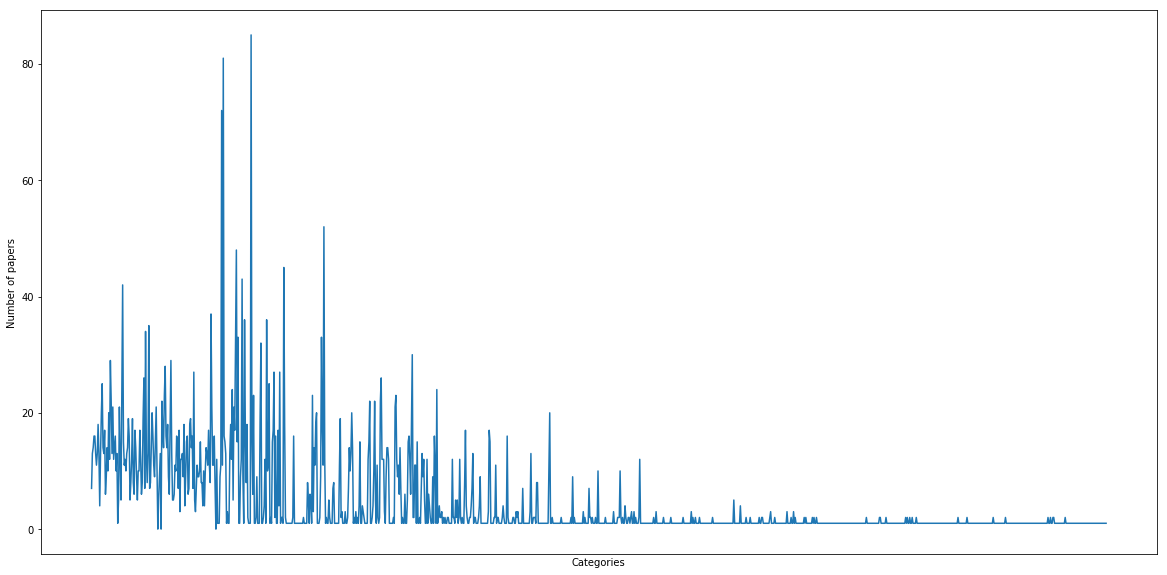

In [25]:
# plot the distribution of the amount of papers in each category
plt.figure(figsize=(20,10))
plt.plot(sum_df.values)
plt.xlabel('Categories')
plt.ylabel('Number of papers')
plt.xticks([])
plt.show()